asdf


In [31]:
# Settings
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")
checkData <- function(data){
    ##필요한 설정들 
    options(warn = -1) ## 경고 지우기
    options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
    library(stringr) # stringr 불러오기
    library(dplyr) # dplyr 불러오기
    library(plotrix) # 3D pie
    library(RColorBrewer) # color package
    library(tidyverse)
		library(hrbrthemes)
		library(kableExtra)
		#library(extrafont)


    par(family ="AppleGothic",bg='grey') # 그래프 배경및 한글설정
    
    cat("*****************(1.DATA HEAD)*****************\n\n");
        print(head(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(2.DATA TAIL)*****************\n\n");
        print(tail(data,2))
    cat("******************************************************************\n\n");
    cat("*****************(3.DATA Structure)*****************\n\n");
        str(data)
    cat("******************************************************************\n\n");
    # data 의 기본 통계량 보기
    cat("*****************(4.DATA Summary)*****************\n\n");
        print(summary(data))
    cat("******************************************************************\n\n");
    cat("*****************(5.NA check)*****************\n\n");
        cat(" 5.1 Data 전체에서의 NA 개수:", sum(is.na(data)),"\n\n")
        # 컬럼 별 na 확인
        cat(" 5.2 Column 별 NA check \n")
        for(i in 1:ncol(data)){
            cat("  col[",colnames(data[i]), "] --> NA 개수:",(sum(is.na(data[,i]))),"\n")
        }
        ## 컬럼별 na 합계 계산. 
        cat("column 별 na 합계 \n",colSums(is.na(data)) ,"\n")
    cat("******************************************************************\n\n");
    cat("*****************(6.Colum 별 data 빈도수 형평성 검사)*****************\n\n");
    #A 컬럼의 최대값 최소값 빈도수
    for(i in 1:ncol(data)){
        #cat("-----",colnames(data)[i] ," 컬럼의 빈도 분석결과----- \n")
        cat("최빈값:",max(table(data[,i])), "최소빈도값 :", min(table(data[,i])), "\n")
        barplot(table(data[,i]),

            main = paste(colnames(data)[i] ," 컬럼의 데이터 별 빈도 분석 \n"),
            ylab = "빈도수",
            xlab = "데이터값",
        )
        
        cat("\n")
        # 각 컬럼의 빈도수의 최대값, 최소값 구하기 
        cat(colnames(data)[i],"컬럼의 빈도수의 최대값과 최소값\n")

    }
    
 
}
## 결측치 보상 함수 
replaceNa <-function(data){
    #data 는 vector 

    # 결측치를 무조건 제거하면 통계량을 얻을수 없으며, 데이터 손실로 문제 발생
    # 1)결측치를 제거하고 평균구하기
    meanDeleteNa <-mean(data,na.rm = T)
    cat( " >> 결측치를 제거후 평균 : ", meanDeleteNa)

    # 2) NA를 0 으로 대체하여 평균구해보기 
    meanRepZero <-mean(ifelse(is.na(data),0,data))
    cat( "\n >> 결측치를 0으로 대체후 평균 : ", meanRepZero)

    # 3) NA 를 중앙값으로 대체하여 평균구해보기
    meanRepMedian <- mean(ifelse(is.na(data),median(data,na.rm = T),data))
    cat("\n >> 결측치를 중앙값(", median(data,na.rm = T),")으로 대체후 평균: ", meanRepMedian,sep="" )

    # 4) NA 를 최소값으로 대체하여 평균 구해보기
    meanRepMin <- mean(ifelse(is.na(data), min(data,na.rm = T),data))
    cat("\n >> 결측치를 최소값(",min(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMin,sep="" )

    meanRepMax <- mean(ifelse(is.na(data), max(data,na.rm = T),data))
    cat("\n >> 결측치를 최대값(",max(data,na.rm = T), ")으로 대체후 평균 : ",meanRepMax,sep="" )
    
    meanRep1Qt <-mean(ifelse(is.na(data), quantile(data,0.25,na.rm = T),data))
    cat("\n >> 결측치를 1사분위(",quantile(data,0.25,na.rm = T), ")으로 대체후 평균 : ",meanRep1Qt,sep="" )

    meanRep2Qt <-mean(ifelse(is.na(data), quantile(data,0.5,na.rm = T),data))
    cat("\n >> 결측치를 2사분위(",quantile(data,0.5,na.rm = T), ")으로 대체후 평균 : ",meanRep2Qt,sep="" )

    meanRep3Qt <-mean(ifelse(is.na(data), quantile(data,0.75,na.rm = T),data))
    cat("\n >> 결측치를 3사분위(",quantile(data,0.75,na.rm = T), ")으로 대체후 평균 : ",meanRep3Qt,sep="" )

    meanRep4Qt <-mean(ifelse(is.na(data), quantile(data,1,na.rm = T),data))
    cat("\n >> 결측치를 4사분위(",quantile(data,1,na.rm = T), ")으로 대체후 평균 : ",meanRep4Qt,sep="" )
    
    ## 최적 결측치 대체 값 계산
    meanReps<-c(meanRep1Qt,meanRep2Qt,meanRep3Qt,meanRep4Qt,meanRepMax,meanRepMin,meanRepMedian,meanRepZero)
    names(meanReps)<-c("1사분위","2사분위","3사분위","4사분위","최대값","최소값","중앙값","0")
    minimum_meanReps<-min(abs(meanReps-mean(data,na.rm = T)))
    meanRepOptimum <-sum(ifelse(abs(meanReps-mean(data,na.rm = T)) == minimum_meanReps,meanReps,0))
    cat ("\n")
    meanRepOptName<-names(meanReps)[which(meanReps== meanRepOptimum)]
    cat("\n >> 최적 대체 => ",meanRepOptName ,"(",meanRepOptimum ,")")


}

#replaceNa(data)
#checkData(data)
## Legend 세팅 함수
setLegend <- function(x,y,xpos,ypos){
    legend(
        trunc(x[,1][trunc(length(x[,1])*xpos)]), # x location of legend
        max(y)*ypos, # y location of legend
        c("Female","Male"),
        #lty= c(1,2),
        fill =c("orange","blue"),
    )
}

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

## 주성분 분석  
:서로 연관되어있는 변수들이 관측되었을때, 이 변수들이 전체적으로 가지고 있는 정보를 최대한 확보하는 적은수의 새로운 변수를 생성하는 방법

- 설문지 분석 등.

In [5]:
# 설문지를 이용한 주성부 분석.

pasta <- read.table("../Data/pasta.txt")
head(pasta) # 5: 매우 좋음

,noodle,dishes,sauce
,<int>,<int>,<int>
pesto_alla_Genovese,2,4,5
Marinara,1,5,1
Puttanesca,5,3,4
Primavera,2,2,3
Vongole,3,5,5
Boscaiola,4,3,2


In [7]:
# 다중 공선성 확인 : 너무 상관이 높아서 마치 쌍둥이 데이터 인것 찾기 cor =0.99 면 둘중에 하나만 쓰면 된다. 
cor(pasta)

,noodle,dishes,sauce
noodle,1.0000000,0.1905002,0.3600411
dishes,0.1905002,1.0000000,0.3004804
sauce,0.3600411,0.3004804,1.0000000


In [10]:
# 표준화 작업 : 평균을 0 으로 표준편차를 1로 변경

summary(pasta)

data1 <- scale(pasta) # R 에는 표준화 함수가 있지만 파이썬에는 없다. 

summary(data1)


     noodle      dishes         sauce     
 Min.   :1   Min.   :2.00   Min.   :1.00  
 1st Qu.:2   1st Qu.:3.00   1st Qu.:2.00  
 Median :3   Median :3.50   Median :3.00  
 Mean   :3   Mean   :3.60   Mean   :2.90  
 3rd Qu.:4   3rd Qu.:4.75   3rd Qu.:3.75  
 Max.   :5   Max.   :5.00   Max.   :5.00  

     noodle            dishes             sauce         
 Min.   :-1.3416   Min.   :-1.36311   Min.   :-1.31112  
 1st Qu.:-0.6708   1st Qu.:-0.51117   1st Qu.:-0.62106  
 Median : 0.0000   Median :-0.08519   Median : 0.06901  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.6708   3rd Qu.: 0.97973   3rd Qu.: 0.58656  
 Max.   : 1.3416   Max.   : 1.19272   Max.   : 1.44914  

In [12]:
# 표준편차 확인
apply (data1, 2, sd)

noodle dishes  sauce 
     1      1      1

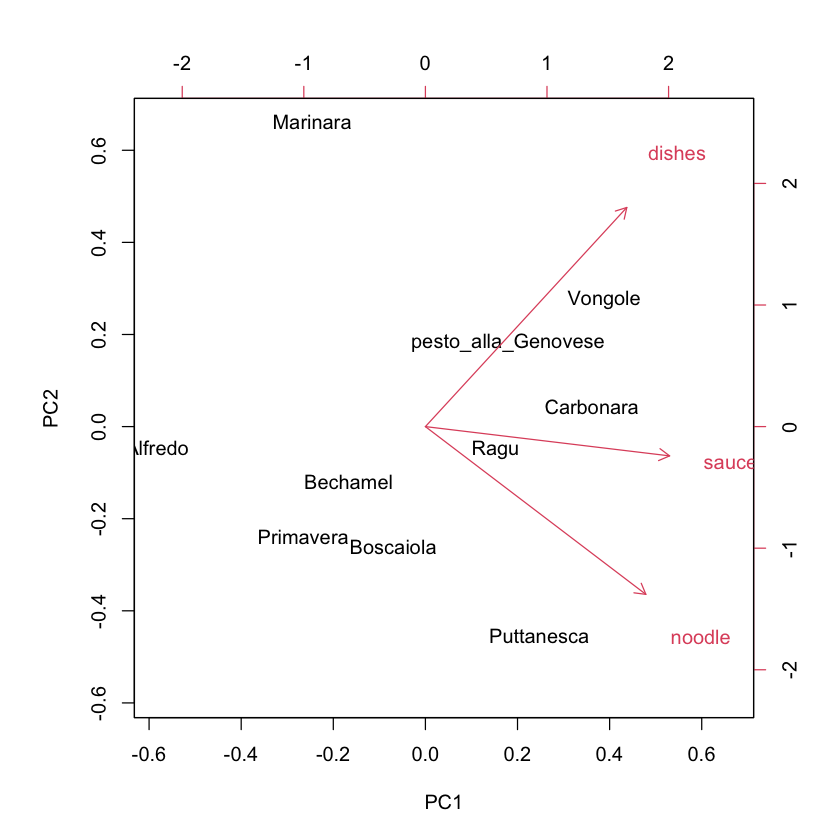

In [16]:
# 주성분 분석 
par( bg ='white')
p1 <- prcomp(pasta, scale = T) # prcomp 에는 스케일 옵션이 있다. 
biplot(p1)

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

,면발,포장재,국물
,<int>,<int>,<int>
신라면,2,4,5
짜파게티,5,2,1
쌀사리곰탕면,3,4,3
무파마,3,3,5
안성탕면,1,2,3
오징어짬뽕,1,3,4


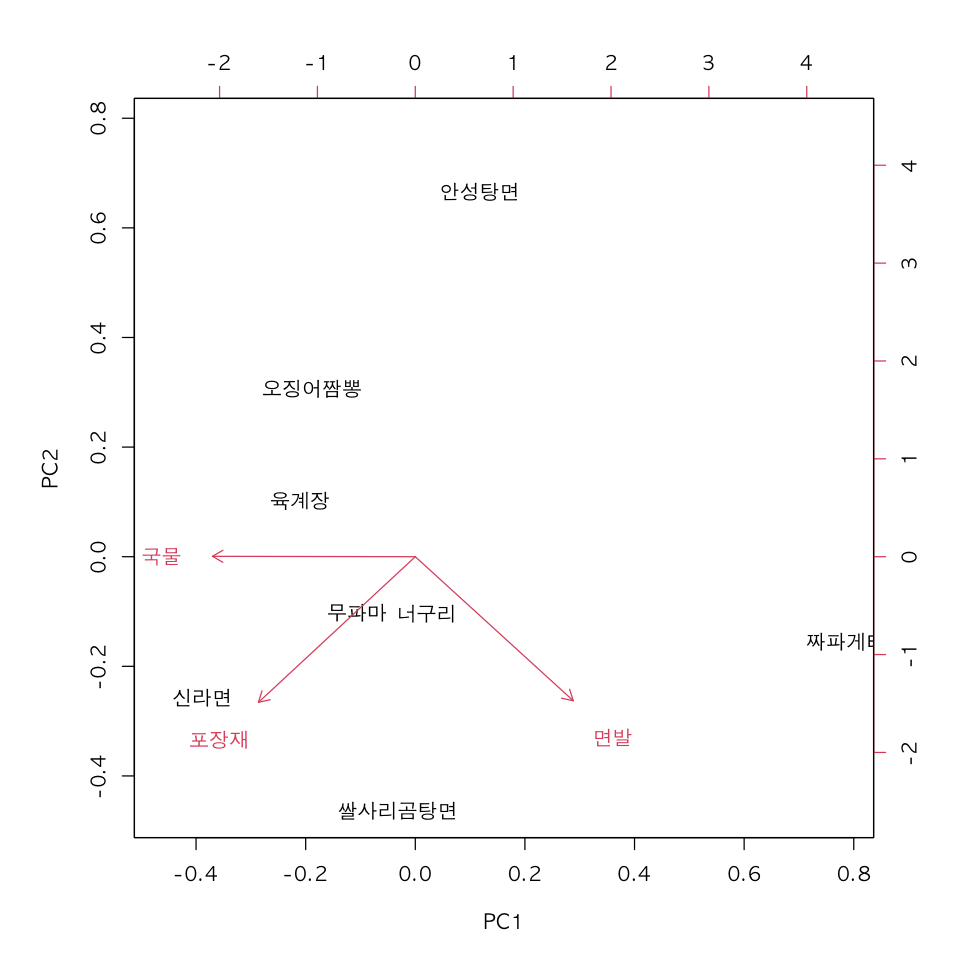

In [47]:

options(warn =-1, repr.plot.width = 8, repr.plot.height = 8)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")
par(family ="applegothic")
ramen <- read.table("../Data/라면.txt", header = T, row.names = "X")
head(ramen)
# rownames(ramen)<-ramen[,1]
# head(ramen[,2:ncol(ramen)])
# 주성분 분석 
par( bg ='white')
p1 <- prcomp(ramen, scale = T,
            #xlim= c(-1,1)
            
            ) # prcomp 에는 스케일 옵션이 있다. 
biplot(p1)

---
# USArrests
: 이 데이터세트에는 1973년 미국 50개 주에서 각각 10만명당 폭행, 살인, 강간으로 체포된 통계가 있다. 
또한 도시 지역에 살고 있는 인구의 비율도 주어진다. 




In [49]:
data(USArrests)
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [51]:
nrow(USArrests)

[1] 50

In [52]:
cor(USArrests)

,Murder,Assault,UrbanPop,Rape
Murder,1.00000000,0.8018733,0.06957262,0.5635788
Assault,0.80187331,1.0000000,0.25887170,0.6652412
UrbanPop,0.06957262,0.2588717,1.00000000,0.4113412
Rape,0.56357883,0.6652412,0.41134124,1.0000000


Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

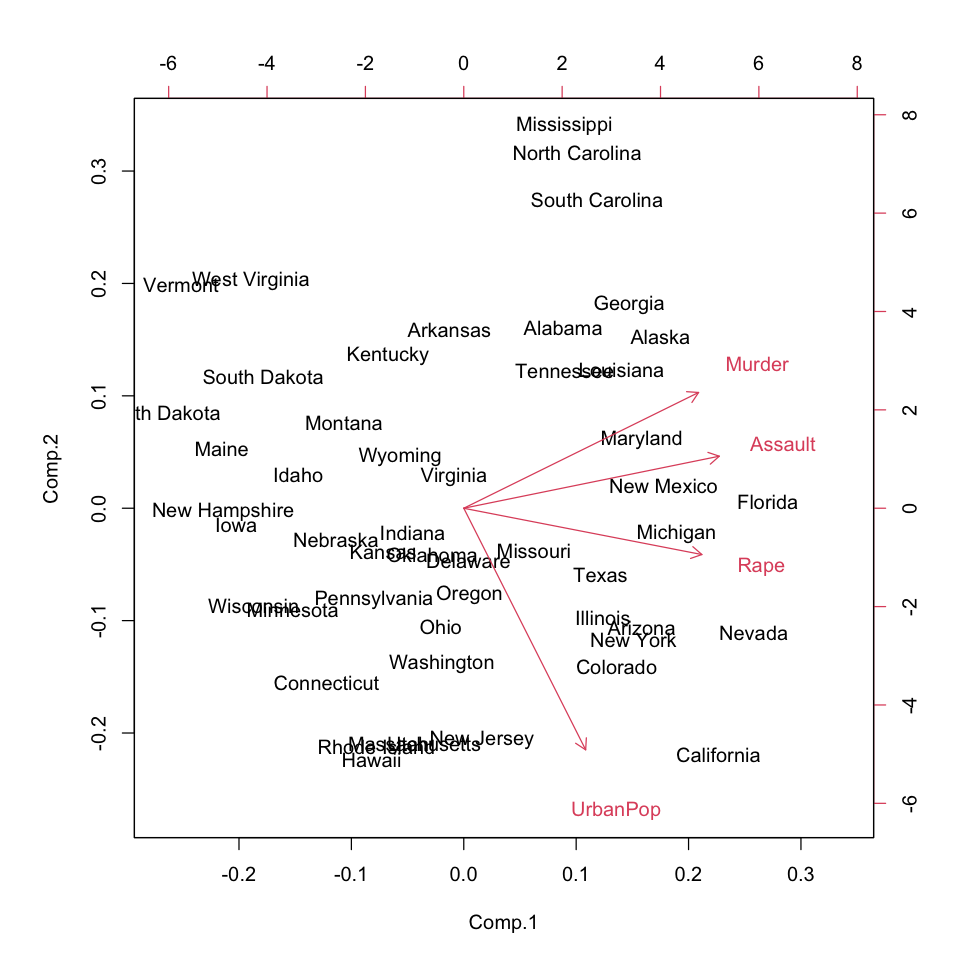

In [57]:
# 주성분 분석
result <- princomp(USArrests, cor =T)
summary (result)
par(bg='white')
biplot(result)

In [59]:
# Comp1, Comp2 가 어떻게 생긴거야?? 
result$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

제 1 주성분 = 0.536*Murder + 0.583*Assult + 0.278*UrbanPop + 0.543*Rape 

In [80]:
# 제 1 주성분으로 새로운 변수값 생성
score<-0.536*USArrests$Murder + 0.583*USArrests$Assault + 0.278*USArrests$UrbanPop + 0.543*USArrests$Rape
score
Result <- data.frame(States =rownames(USArrests), Score= score)
#library(dplyr)
arrange(Result, Score)

[1] 172.2988 196.1965 214.8166 139.9753 213.0758 165.8645  93.3321 170.5118
 [9] 243.1211 163.0288  63.7014  94.0762 186.8474  99.2112  55.8091  98.3830
[17]  92.0531 183.8240  67.9280 214.6782 121.7063 194.7819  69.8619 181.1439
[25] 143.3706  90.4022  87.9663 200.9512  55.0831 131.6138 209.1557 192.1119
[33] 224.6913  42.8597 106.3430 121.3346 129.8593  93.2815 131.9573 195.9369
[41]  71.6352 147.6879 160.0767 106.3499  44.1408 124.2581 121.1996  66.1701
[49]  56.5050 122.6586

States,Score
<chr>,<dbl>
North Dakota,42.8597
Vermont,44.1408
New Hampshire,55.0831
Iowa,55.8091
Wisconsin,56.5050
Hawaii,63.7014
West Virginia,66.1701
Maine,67.9280
Minnesota,69.8619


In [72]:

0.583*USArrests$Assult

numeric(0)